In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading the data
df = pd.read_csv('Incentives Senior Data Analyst.csv')
# addition of 'months' to have a continues variable for regression
df['months'] = df.index + 1
df.head()

,month_year,Revenue,Orders,Acquisitions,Active Customers,Mass Media Spend,Performance Marketing Spend,Affordability Spend,months
0,2018_06,856086,53849,4787,21292,11056,14090,3804,1
1,2018_07,729780,45413,4168,19832,8820,12043,4121,2
2,2018_08,803871,52941,4621,20640,93329,11527,6470,3
3,2018_09,813762,54217,4672,21334,60545,13617,6803,4
4,2018_10,1098477,83716,7671,28115,34085,16817,10574,5


In [3]:
investment_features = ["Mass Media Spend", "Performance Marketing Spend", "Affordability Spend"]
df['total_spend'] = df[investment_features].sum(axis=1)

In [4]:
# creation of sub-dataframes with each KPI and investment_fatures for correlation matrices
revenue = ['Revenue'] + investment_features
orders = ['Orders'] + investment_features
acquisitions = ['Acquisitions'] + investment_features
active_cust = ['Active Customers'] + investment_features

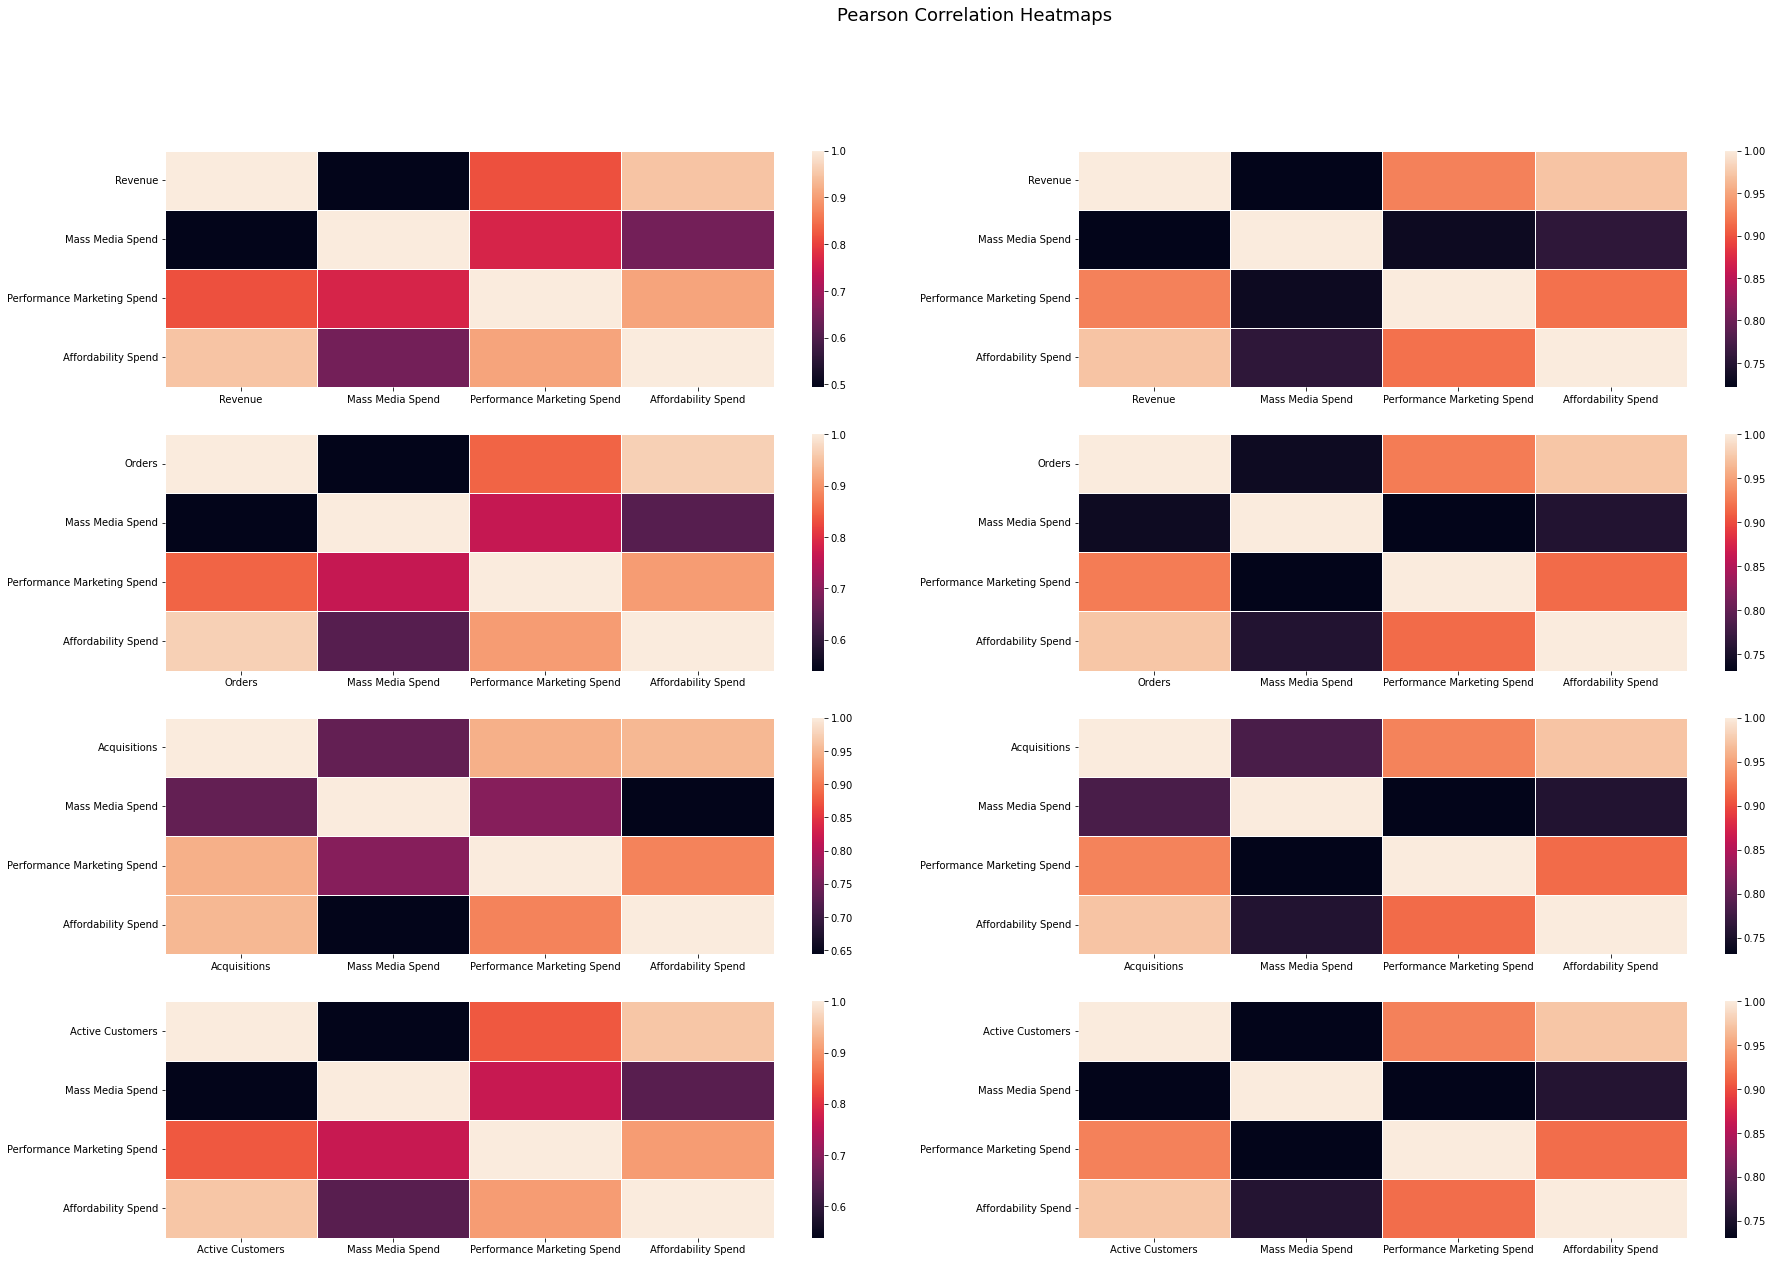

In [5]:
# calculation the correlation matrices
corr_rev = df[revenue].corr()
corr_rev_log = np.log(df[revenue]).corr()
corr_orders = df[orders].corr()
corr_orders_log = np.log(df[orders]).corr()
corr_acquisitions = df[acquisitions].corr()
corr_acquisitions_log = np.log(df[acquisitions]).corr()
corr_active_cust = df[active_cust].corr()
corr_active_cust_log = np.log(df[active_cust]).corr()

corrs = [corr_rev,corr_rev_log,
         corr_orders,corr_orders_log,
         corr_acquisitions,corr_acquisitions_log,
         corr_active_cust,corr_active_cust_log]

# plotting the heatmaps
fig, axes = plt.subplots(4, 2, figsize=(30,20))
fig.suptitle("Pearson Correlation Heatmaps",fontsize=18)

for corr, ax in zip(corrs, axes.flat):
    sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, ax=ax, linewidths=.5)
plt.show()

<h4 align="center">Left graphs are nominal correlations, right graphs are logarithmic correlations</h4>

In [6]:
corr_rev.style.background_gradient(cmap = sns.diverging_palette(5, 250, as_cmap=True))

,Revenue,Mass Media Spend,Performance Marketing Spend,Affordability Spend
Revenue,1.000000,0.494691,0.815860,0.947647
Mass Media Spend,0.494691,1.000000,0.764318,0.643958
Performance Marketing Spend,0.815860,0.764318,1.000000,0.907588
Affordability Spend,0.947647,0.643958,0.907588,1.000000


In [7]:
corr_rev['Revenue'][1:].sort_values(ascending=False)

Affordability Spend            0.947647
Performance Marketing Spend    0.815860
Mass Media Spend               0.494691
Name: Revenue, dtype: float64

In [8]:
corr_rev_log.style.background_gradient(cmap = sns.diverging_palette(5, 250, as_cmap=True))\
            .set_caption("Logarithms")

,Revenue,Mass Media Spend,Performance Marketing Spend,Affordability Spend
Revenue,1.000000,0.721735,0.926272,0.970964
Mass Media Spend,0.721735,1.000000,0.731321,0.755745
Performance Marketing Spend,0.926272,0.731321,1.000000,0.917022
Affordability Spend,0.970964,0.755745,0.917022,1.000000


In [9]:
corr_rev_log['Revenue'][1:].sort_values(ascending=False)

Affordability Spend            0.970964
Performance Marketing Spend    0.926272
Mass Media Spend               0.721735
Name: Revenue, dtype: float64

In [10]:
corr_orders.style.background_gradient(cmap = sns.diverging_palette(5, 250, as_cmap=True))

,Orders,Mass Media Spend,Performance Marketing Spend,Affordability Spend
Orders,1.000000,0.539981,0.849387,0.966777
Mass Media Spend,0.539981,1.000000,0.764318,0.643958
Performance Marketing Spend,0.849387,0.764318,1.000000,0.907588
Affordability Spend,0.966777,0.643958,0.907588,1.000000


In [11]:
corr_orders['Orders'][1:].sort_values(ascending=False)

Affordability Spend            0.966777
Performance Marketing Spend    0.849387
Mass Media Spend               0.539981
Name: Orders, dtype: float64

In [12]:
corr_orders_log.style.background_gradient(cmap = sns.diverging_palette(5, 250, as_cmap=True))\
            .set_caption("Logarithms")

,Orders,Mass Media Spend,Performance Marketing Spend,Affordability Spend
Orders,1.000000,0.741608,0.925592,0.973526
Mass Media Spend,0.741608,1.000000,0.731321,0.755745
Performance Marketing Spend,0.925592,0.731321,1.000000,0.917022
Affordability Spend,0.973526,0.755745,0.917022,1.000000


In [13]:
corr_orders_log['Orders'][1:].sort_values(ascending=False)

Affordability Spend            0.973526
Performance Marketing Spend    0.925592
Mass Media Spend               0.741608
Name: Orders, dtype: float64

In [14]:
corr_acquisitions.style.background_gradient(cmap = sns.diverging_palette(5, 250, as_cmap=True))

,Acquisitions,Mass Media Spend,Performance Marketing Spend,Affordability Spend
Acquisitions,1.000000,0.735530,0.944689,0.952561
Mass Media Spend,0.735530,1.000000,0.764318,0.643958
Performance Marketing Spend,0.944689,0.764318,1.000000,0.907588
Affordability Spend,0.952561,0.643958,0.907588,1.000000


In [15]:
corr_acquisitions['Acquisitions'][1:].sort_values(ascending=False)

Affordability Spend            0.952561
Performance Marketing Spend    0.944689
Mass Media Spend               0.735530
Name: Acquisitions, dtype: float64

In [16]:
corr_acquisitions_log.style.background_gradient(cmap = sns.diverging_palette(5, 250, as_cmap=True))\
            .set_caption("Logarithms")

,Acquisitions,Mass Media Spend,Performance Marketing Spend,Affordability Spend
Acquisitions,1.000000,0.783208,0.929891,0.971686
Mass Media Spend,0.783208,1.000000,0.731321,0.755745
Performance Marketing Spend,0.929891,0.731321,1.000000,0.917022
Affordability Spend,0.971686,0.755745,0.917022,1.000000


In [17]:
corr_acquisitions_log['Acquisitions'][1:].sort_values(ascending=False)

Affordability Spend            0.971686
Performance Marketing Spend    0.929891
Mass Media Spend               0.783208
Name: Acquisitions, dtype: float64

In [18]:
corr_active_cust.style.background_gradient(cmap = sns.diverging_palette(5, 250, as_cmap=True))

,Active Customers,Mass Media Spend,Performance Marketing Spend,Affordability Spend
Active Customers,1.000000,0.538405,0.838280,0.953449
Mass Media Spend,0.538405,1.000000,0.764318,0.643958
Performance Marketing Spend,0.838280,0.764318,1.000000,0.907588
Affordability Spend,0.953449,0.643958,0.907588,1.000000


In [19]:
corr_active_cust['Active Customers'][1:].sort_values(ascending=False)

Affordability Spend            0.953449
Performance Marketing Spend    0.838280
Mass Media Spend               0.538405
Name: Active Customers, dtype: float64

In [20]:
corr_active_cust_log.style.background_gradient(cmap = sns.diverging_palette(5, 250, as_cmap=True))\
            .set_caption("Logarithms")

,Active Customers,Mass Media Spend,Performance Marketing Spend,Affordability Spend
Active Customers,1.000000,0.730378,0.928654,0.972803
Mass Media Spend,0.730378,1.000000,0.731321,0.755745
Performance Marketing Spend,0.928654,0.731321,1.000000,0.917022
Affordability Spend,0.972803,0.755745,0.917022,1.000000


In [21]:
corr_active_cust_log['Active Customers'][1:].sort_values(ascending=False)

Affordability Spend            0.972803
Performance Marketing Spend    0.928654
Mass Media Spend               0.730378
Name: Active Customers, dtype: float64

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
# row-wise normalization of investment_features to check if it helps regression
normed_df = pd.DataFrame(normalize(df[investment_features], axis=1, norm='l1'), columns = investment_features)
normed_X = pd.concat([df["months"], normed_df], axis=1)

In [24]:
# column-wise normalization of y to check if it helps regression
targets = ["Revenue","Orders","Acquisitions","Active Customers"]
scaler = MinMaxScaler()
scaled_targets = pd.DataFrame(scaler.fit_transform(df[targets]), columns = targets)

In [25]:
# function for linear regression with errors and coefficients
def lin_reg(X, y, model_name):
    model = LinearRegression()
    model.fit(X, y)
    reg_columns = ["intercept"] + list(normed_X.columns) + ["R^2"]
    reg_coefs = np.append(np.append(model.intercept_,model.coef_),np.array(model.score(X, y))).reshape(1,6)
    reg_coefs_df = pd.DataFrame(reg_coefs, columns = reg_columns, index = [model_name])
    reg_coefs_df.index.name = 'Models'
    y_pred = model.predict(X)
    print("mean_absolute_percentage_error: {:.3}\n\
mean_absolute_error: {:.3}\n\
mean_absolute_percentage_error of the last 6 months: {:.3}\n\
mean_absolute_error of the last 6 months: {:.3}"
          .format(mean_absolute_percentage_error(y, y_pred),
                  mean_absolute_error(y, y_pred),
                  mean_absolute_percentage_error(y.loc[18:], y_pred[len(y_pred)-6:]),
                  mean_absolute_error(y.loc[18:], y_pred[len(y_pred)-6:])))
    return model, y_pred, reg_coefs_df

In [26]:
# function for plotting the regression with respect to each variable
def lin_reg_plotter(X, y, y_pred):
    sns.set_context("paper", rc={"font.size":8,"axes.titlesize":8,"axes.labelsize":7,"axes.linewidth":0.5})
    sns.set_style("white")
    fig, axes = plt.subplots(2, 2, figsize=(5,3.5), dpi=160)
    fig.suptitle("Linear Regressions",fontsize=8)
    
    for i, ax in zip(range(4), axes.flat):
        sns.lineplot(x=X.iloc[:,i], y=y, ax=ax, linewidth=1.2)
        sns.lineplot(x=X.iloc[:,i], y=y_pred, ax=ax, linewidth=1.2)
    labels = ['Actual','Predictions']
    fig.legend(labels)
    plt.tight_layout()

In [27]:
X = normed_X
y = scaled_targets["Acquisitions"]
model_name = 'normed_scaled_Acquisitions'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = reg_coefs_df_1

mean_absolute_percentage_error: 1.6e+13
mean_absolute_error: 0.128
mean_absolute_percentage_error of the last 6 months: 0.205
mean_absolute_error of the last 6 months: 0.167


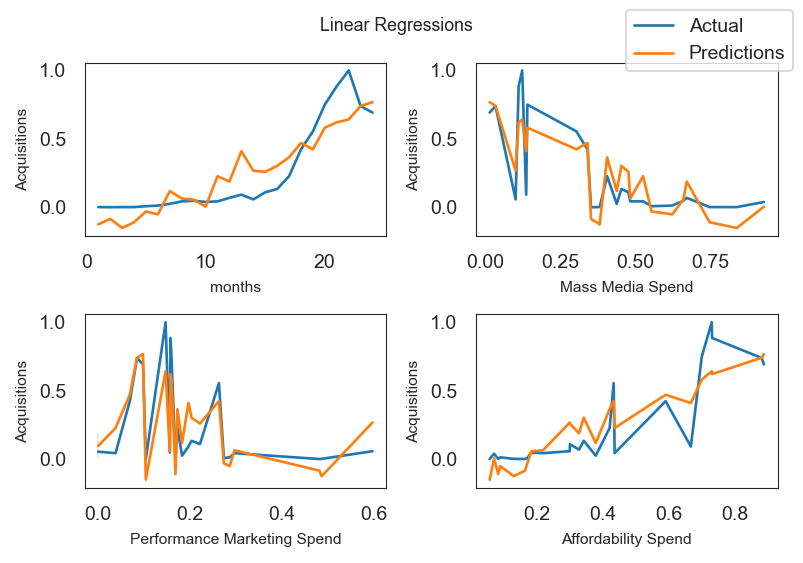

In [28]:
lin_reg_plotter(X,y,y_pred)

In [29]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-0.051314,0.022478,-0.207881,-0.124936,0.332818,0.763045


In [30]:
X = normed_X
y = df["Acquisitions"]
model_name = 'normed_Acquisitions'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 3.06
mean_absolute_error: 5.96e+04
mean_absolute_percentage_error of the last 6 months: 0.203
mean_absolute_error of the last 6 months: 7.77e+04


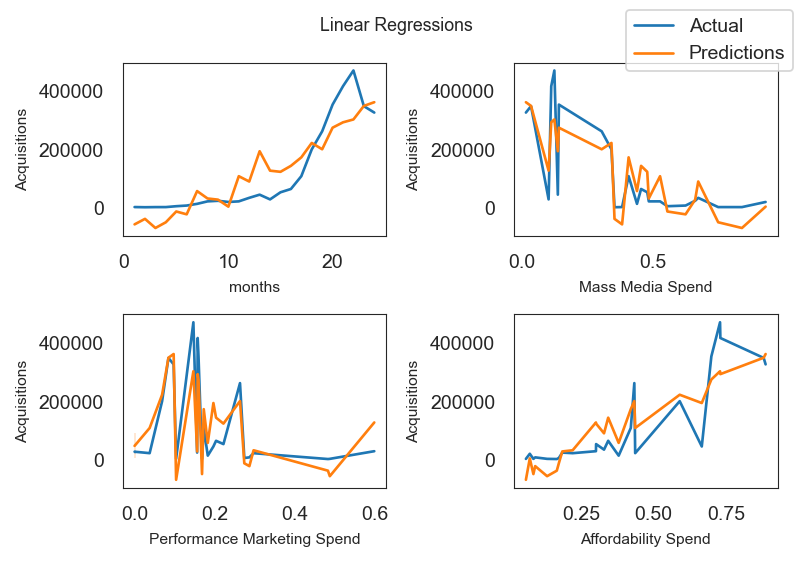

In [31]:
lin_reg_plotter(X,y,y_pred)

In [32]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-0.051314,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-19743.658571,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045


In [33]:
X = df[["months"]+investment_features]
y = df["Acquisitions"]
model_name = 'Acquisitions'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 0.739
mean_absolute_error: 1.8e+04
mean_absolute_percentage_error of the last 6 months: 0.102
mean_absolute_error of the last 6 months: 3.55e+04


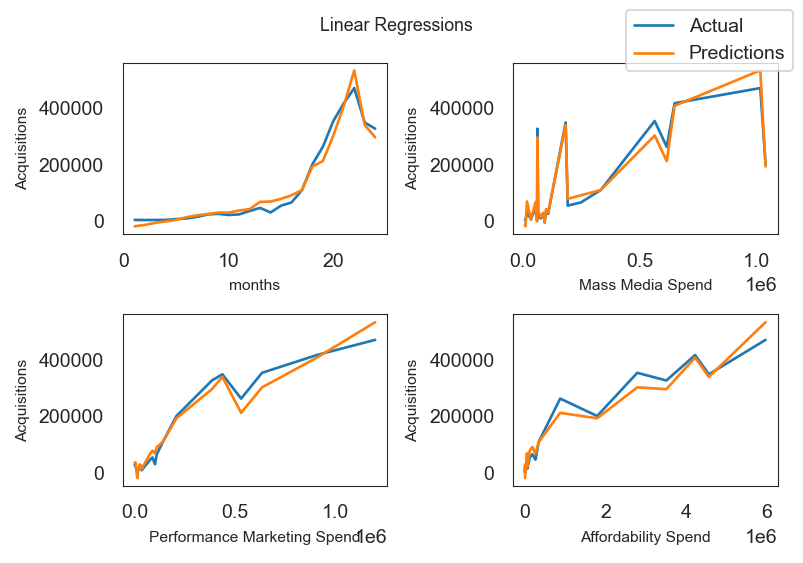

In [34]:
lin_reg_plotter(X,y,y_pred)

In [35]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-0.051314,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-19743.658571,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-26037.430571,5430.780729,0.021438,0.171506,0.035445,0.972761


In [36]:
X = normed_X[~normed_X.index.isin([9,10,11])]
y = scaled_targets["Acquisitions"][~df.index.isin([9,10,11])]
model_name = 'normed_scaled_filtered_Acquisitions'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 2.05e+13
mean_absolute_error: 0.131
mean_absolute_percentage_error of the last 6 months: 0.211
mean_absolute_error of the last 6 months: 0.169


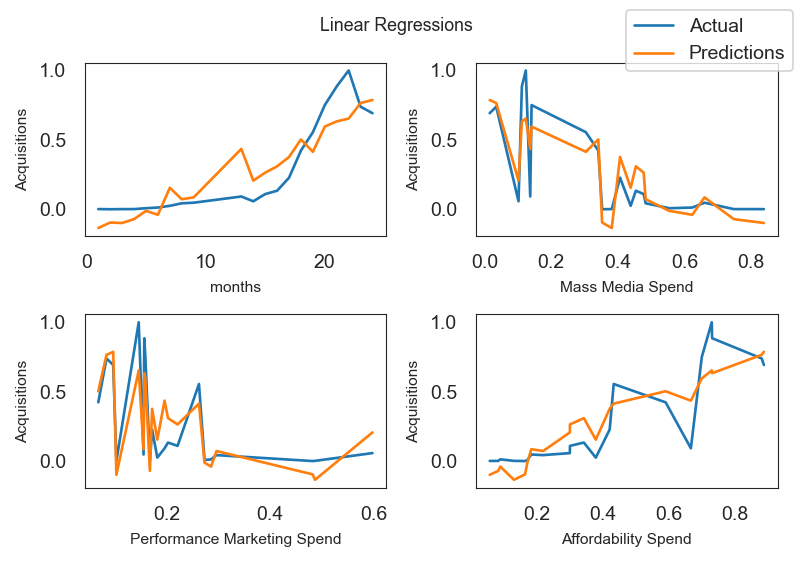

In [37]:
lin_reg_plotter(X,y,y_pred)

In [38]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-0.051314,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-19743.658571,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-26037.430571,5430.780729,0.021438,0.171506,0.035445,0.972761
normed_scaled_filtered_Acquisitions,-0.024447,0.019711,-0.156447,-0.256421,0.412868,0.776554


In [39]:
X = normed_X[~normed_X.index.isin([9,10,11])]
y = df["Acquisitions"][~df.index.isin([9,10,11])]
model_name = 'normed_filtered_Acquisitions'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 2.87
mean_absolute_error: 6.08e+04
mean_absolute_percentage_error of the last 6 months: 0.208
mean_absolute_error of the last 6 months: 7.89e+04


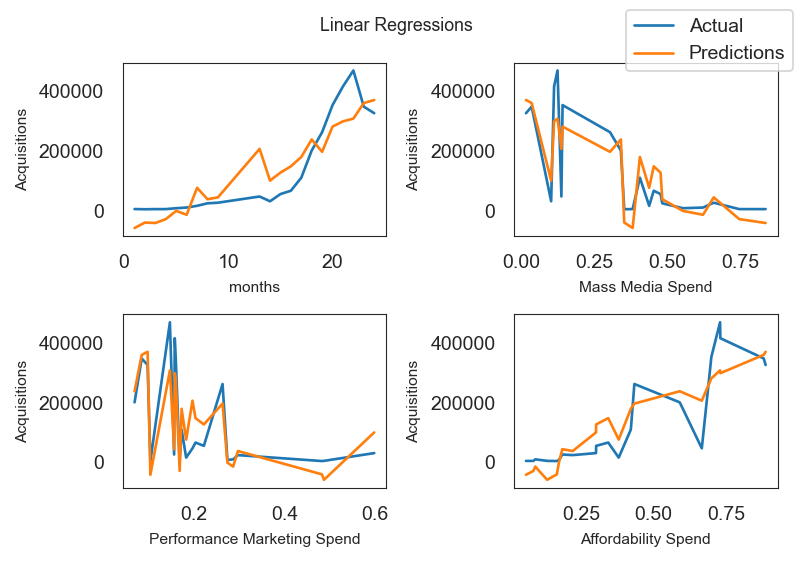

In [40]:
lin_reg_plotter(X,y,y_pred)

In [41]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-0.051314,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-19743.658571,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-26037.430571,5430.780729,0.021438,0.171506,0.035445,0.972761
normed_scaled_filtered_Acquisitions,-0.024447,0.019711,-0.156447,-0.256421,0.412868,0.776554
normed_filtered_Acquisitions,-7224.042939,9184.953871,-72902.343092,-119488.923816,192391.266907,0.776554


In [42]:
X = df[["months"]+investment_features][~df.index.isin([9,10,11])]
y = df["Acquisitions"][~df.index.isin([9,10,11])]
model_name = 'filtered_Acquisitions'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 0.76
mean_absolute_error: 1.95e+04
mean_absolute_percentage_error of the last 6 months: 0.0989
mean_absolute_error of the last 6 months: 3.44e+04


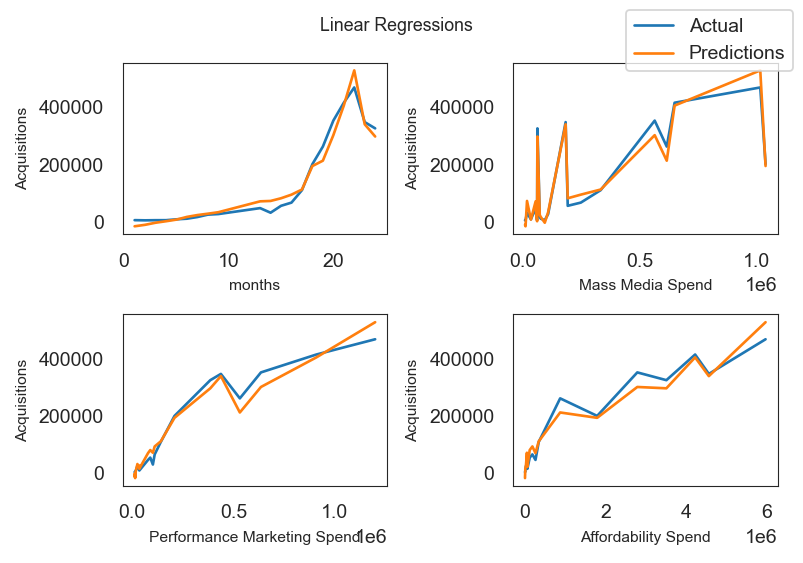

In [43]:
lin_reg_plotter(X,y,y_pred)

In [44]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-0.051314,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-19743.658571,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-26037.430571,5430.780729,0.021438,0.171506,0.035445,0.972761
normed_scaled_filtered_Acquisitions,-0.024447,0.019711,-0.156447,-0.256421,0.412868,0.776554
normed_filtered_Acquisitions,-7224.042939,9184.953871,-72902.343092,-119488.923816,192391.266907,0.776554
filtered_Acquisitions,-25039.884374,5565.704852,0.020535,0.167931,0.035228,0.971920


In [45]:
log_X = pd.DataFrame(np.log(df[investment_features]), columns = investment_features)
log_X = pd.concat([df["months"], log_X], axis=1)[~df.index.isin([9,10,11])]

In [46]:
X = log_X
y = df["Acquisitions"][~df.index.isin([9,10,11])]
model_name = 'log_Acquisitions'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 2.69
mean_absolute_error: 4.17e+04
mean_absolute_percentage_error of the last 6 months: 0.106
mean_absolute_error of the last 6 months: 3.81e+04


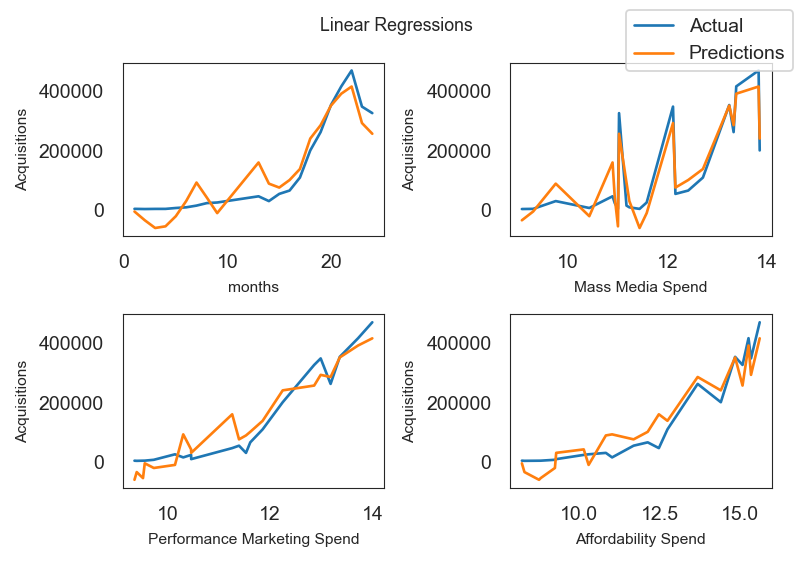

In [47]:
lin_reg_plotter(X,y,y_pred)

In [48]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-5.131400e-02,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-1.974366e+04,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-2.603743e+04,5430.780729,0.021438,0.171506,0.035445,0.972761
normed_scaled_filtered_Acquisitions,-2.444713e-02,0.019711,-0.156447,-0.256421,0.412868,0.776554
normed_filtered_Acquisitions,-7.224043e+03,9184.953871,-72902.343092,-119488.923816,192391.266907,0.776554
filtered_Acquisitions,-2.503988e+04,5565.704852,0.020535,0.167931,0.035228,0.971920
log_Acquisitions,-1.361731e+06,-19905.528127,-11409.344788,106405.939923,56669.589310,0.901536


In [49]:
X = log_X
y = np.log(df["Acquisitions"][~df.index.isin([9,10,11])])
model_name = 'log_log(Acquisitions)'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 0.0141
mean_absolute_error: 0.141
mean_absolute_percentage_error of the last 6 months: 0.00749
mean_absolute_error of the last 6 months: 0.0957


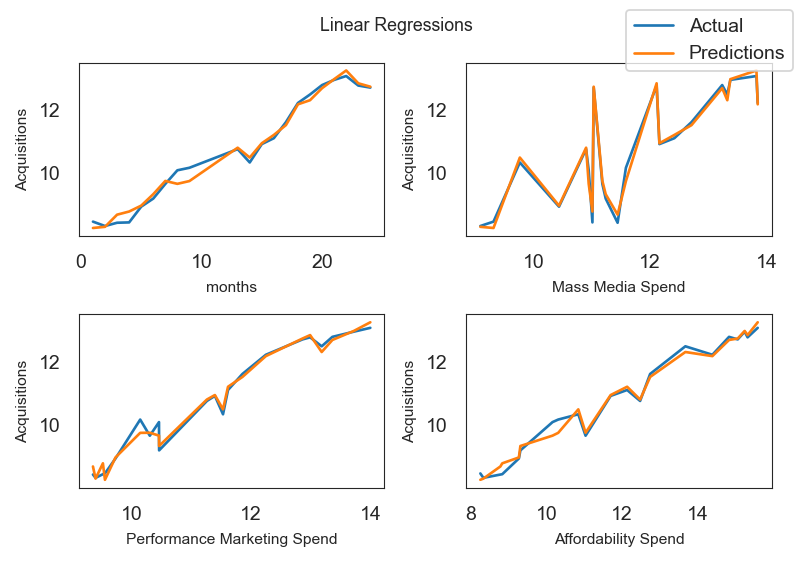

In [50]:
lin_reg_plotter(X,y,y_pred)

In [51]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-5.131400e-02,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-1.974366e+04,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-2.603743e+04,5430.780729,0.021438,0.171506,0.035445,0.972761
normed_scaled_filtered_Acquisitions,-2.444713e-02,0.019711,-0.156447,-0.256421,0.412868,0.776554
normed_filtered_Acquisitions,-7.224043e+03,9184.953871,-72902.343092,-119488.923816,192391.266907,0.776554
filtered_Acquisitions,-2.503988e+04,5565.704852,0.020535,0.167931,0.035228,0.971920
log_Acquisitions,-1.361731e+06,-19905.528127,-11409.344788,106405.939923,56669.589310,0.901536
log_log(Acquisitions),2.945078e+00,0.082171,0.089903,0.270422,0.221437,0.987208


In [52]:
X = log_X
y = np.log(df["Orders"][~df.index.isin([9,10,11])])
model_name = 'log_log(Orders)'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 0.0082
mean_absolute_error: 0.104
mean_absolute_percentage_error of the last 6 months: 0.00378
mean_absolute_error of the last 6 months: 0.0593


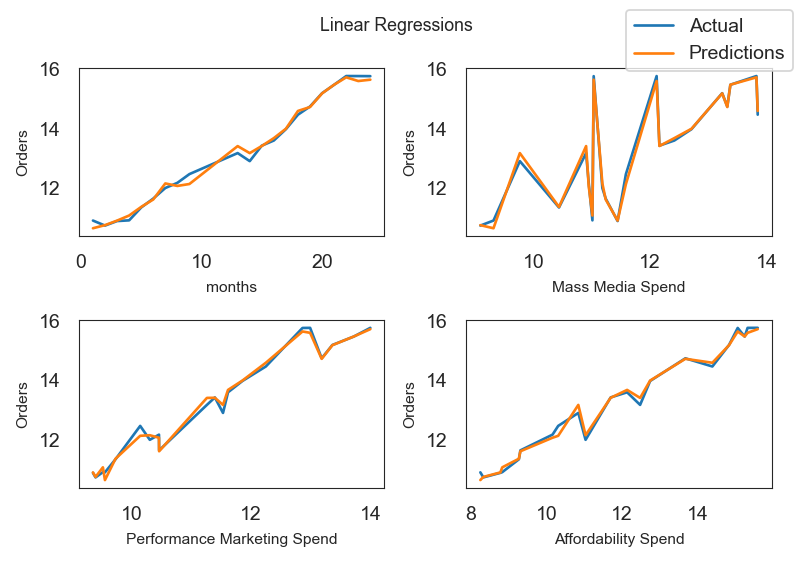

In [53]:
lin_reg_plotter(X,y,y_pred)

In [54]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-5.131400e-02,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-1.974366e+04,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-2.603743e+04,5430.780729,0.021438,0.171506,0.035445,0.972761
normed_scaled_filtered_Acquisitions,-2.444713e-02,0.019711,-0.156447,-0.256421,0.412868,0.776554
normed_filtered_Acquisitions,-7.224043e+03,9184.953871,-72902.343092,-119488.923816,192391.266907,0.776554
filtered_Acquisitions,-2.503988e+04,5565.704852,0.020535,0.167931,0.035228,0.971920
log_Acquisitions,-1.361731e+06,-19905.528127,-11409.344788,106405.939923,56669.589310,0.901536
log_log(Acquisitions),2.945078e+00,0.082171,0.089903,0.270422,0.221437,0.987208
log_log(Orders),6.568412e+00,0.110680,-0.029417,0.212027,0.267203,0.993264


In [55]:
X = log_X
y = np.log(df["Revenue"][~df.index.isin([9,10,11])])
model_name = 'log_log(Revenue)'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 0.00895
mean_absolute_error: 0.137
mean_absolute_percentage_error of the last 6 months: 0.00684
mean_absolute_error of the last 6 months: 0.121


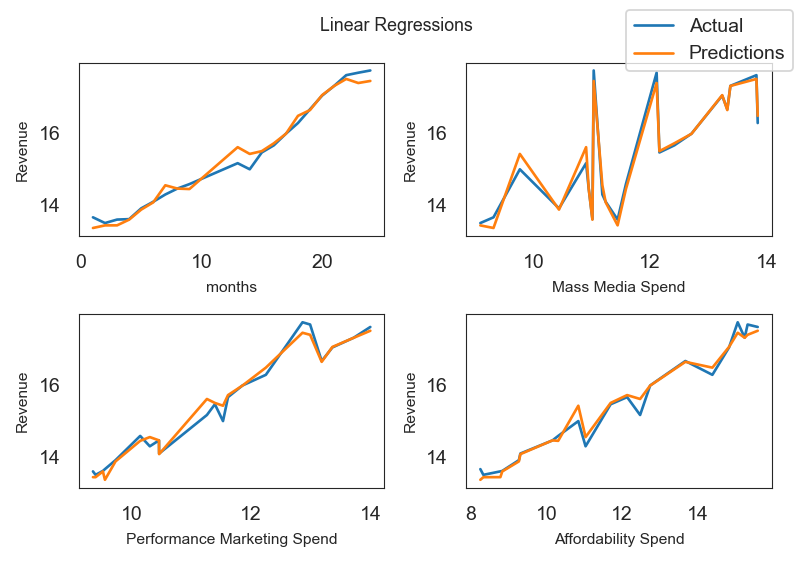

In [56]:
lin_reg_plotter(X,y,y_pred)

In [57]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-5.131400e-02,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-1.974366e+04,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-2.603743e+04,5430.780729,0.021438,0.171506,0.035445,0.972761
normed_scaled_filtered_Acquisitions,-2.444713e-02,0.019711,-0.156447,-0.256421,0.412868,0.776554
normed_filtered_Acquisitions,-7.224043e+03,9184.953871,-72902.343092,-119488.923816,192391.266907,0.776554
filtered_Acquisitions,-2.503988e+04,5565.704852,0.020535,0.167931,0.035228,0.971920
log_Acquisitions,-1.361731e+06,-19905.528127,-11409.344788,106405.939923,56669.589310,0.901536
log_log(Acquisitions),2.945078e+00,0.082171,0.089903,0.270422,0.221437,0.987208
log_log(Orders),6.568412e+00,0.110680,-0.029417,0.212027,0.267203,0.993264


In [58]:
X = log_X
y = np.log(df["Active Customers"][~df.index.isin([9,10,11])])
model_name = 'log_log(Active Customers)'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 0.00947
mean_absolute_error: 0.108
mean_absolute_percentage_error of the last 6 months: 0.0049
mean_absolute_error of the last 6 months: 0.069


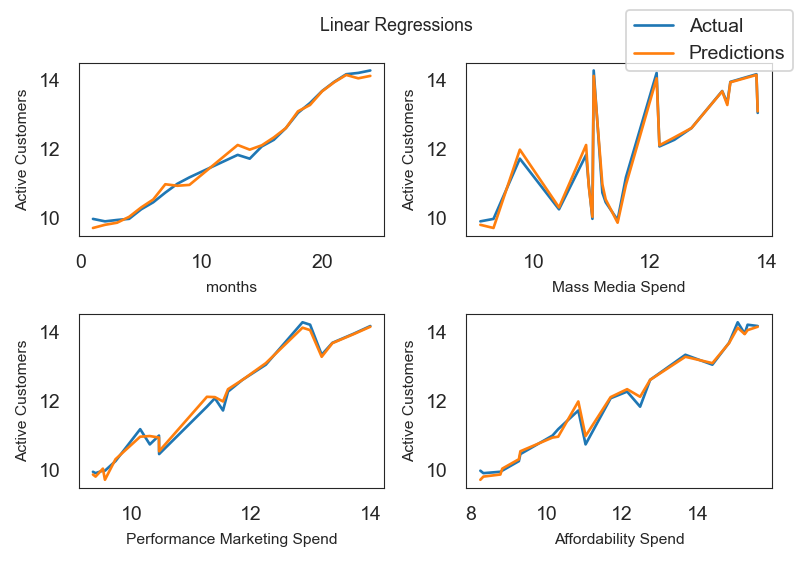

In [59]:
lin_reg_plotter(X,y,y_pred)

In [60]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-5.131400e-02,0.022478,-0.207881,-0.124936,0.332818,0.763045
normed_Acquisitions,-1.974366e+04,10474.532163,-96869.997122,-58218.715415,155088.712537,0.763045
Acquisitions,-2.603743e+04,5430.780729,0.021438,0.171506,0.035445,0.972761
normed_scaled_filtered_Acquisitions,-2.444713e-02,0.019711,-0.156447,-0.256421,0.412868,0.776554
normed_filtered_Acquisitions,-7.224043e+03,9184.953871,-72902.343092,-119488.923816,192391.266907,0.776554
filtered_Acquisitions,-2.503988e+04,5565.704852,0.020535,0.167931,0.035228,0.971920
log_Acquisitions,-1.361731e+06,-19905.528127,-11409.344788,106405.939923,56669.589310,0.901536
log_log(Acquisitions),2.945078e+00,0.082171,0.089903,0.270422,0.221437,0.987208
log_log(Orders),6.568412e+00,0.110680,-0.029417,0.212027,0.267203,0.993264


In [61]:
X = log_X
y = df["Orders"][~df.index.isin([9,10,11])]
model_name = 'log_Orders'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 4.5
mean_absolute_error: 9.55e+05
mean_absolute_percentage_error of the last 6 months: 0.205
mean_absolute_error of the last 6 months: 1.14e+06


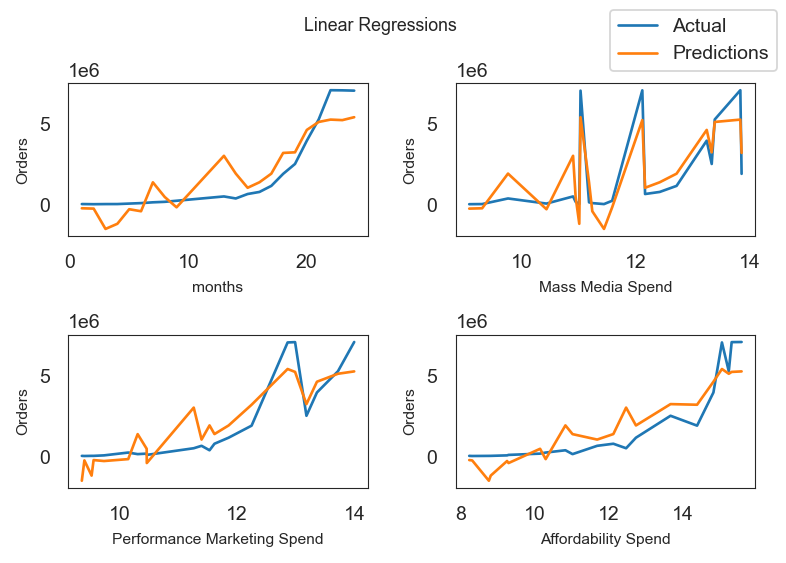

In [62]:
lin_reg_plotter(X,y,y_pred)

In [63]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-5.131400e-02,0.022478,-0.207881,-0.124936,3.328177e-01,0.763045
normed_Acquisitions,-1.974366e+04,10474.532163,-96869.997122,-58218.715415,1.550887e+05,0.763045
Acquisitions,-2.603743e+04,5430.780729,0.021438,0.171506,3.544503e-02,0.972761
normed_scaled_filtered_Acquisitions,-2.444713e-02,0.019711,-0.156447,-0.256421,4.128683e-01,0.776554
normed_filtered_Acquisitions,-7.224043e+03,9184.953871,-72902.343092,-119488.923816,1.923913e+05,0.776554
filtered_Acquisitions,-2.503988e+04,5565.704852,0.020535,0.167931,3.522760e-02,0.971920
log_Acquisitions,-1.361731e+06,-19905.528127,-11409.344788,106405.939923,5.666959e+04,0.901536
log_log(Acquisitions),2.945078e+00,0.082171,0.089903,0.270422,2.214371e-01,0.987208
log_log(Orders),6.568412e+00,0.110680,-0.029417,0.212027,2.672032e-01,0.993264


In [64]:
X = df[["months"]+investment_features]
y = df["Orders"]
model_name = 'Orders'
model, y_pred, reg_coefs_df_1 = lin_reg(X, y, model_name)
reg_coefs_df_ = pd.concat([reg_coefs_df_, reg_coefs_df_1])

mean_absolute_percentage_error: 1.17
mean_absolute_error: 2.71e+05
mean_absolute_percentage_error of the last 6 months: 0.118
mean_absolute_error of the last 6 months: 4.84e+05


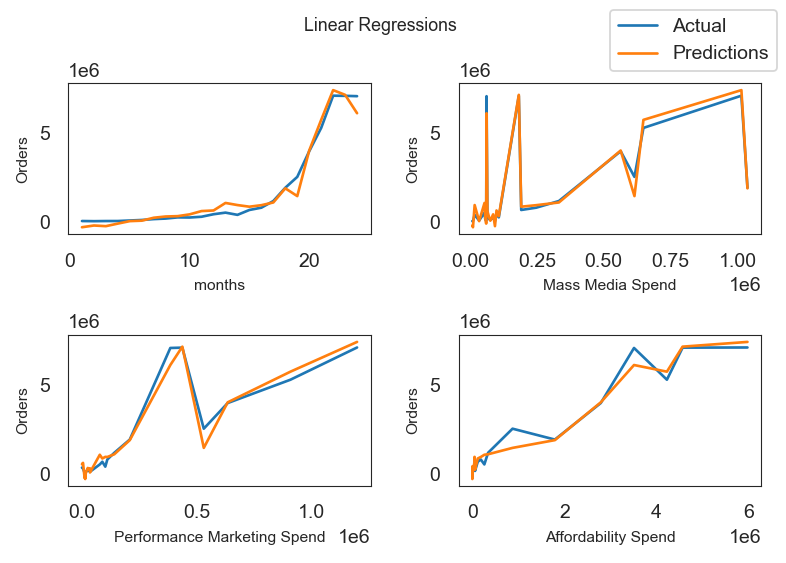

In [65]:
lin_reg_plotter(X,y,y_pred)

In [66]:
reg_coefs_df_

,intercept,months,Mass Media Spend,Performance Marketing Spend,Affordability Spend,R^2
Models,,,,,,
normed_scaled_Acquisitions,-5.131400e-02,0.022478,-0.207881,-0.124936,3.328177e-01,0.763045
normed_Acquisitions,-1.974366e+04,10474.532163,-96869.997122,-58218.715415,1.550887e+05,0.763045
Acquisitions,-2.603743e+04,5430.780729,0.021438,0.171506,3.544503e-02,0.972761
normed_scaled_filtered_Acquisitions,-2.444713e-02,0.019711,-0.156447,-0.256421,4.128683e-01,0.776554
normed_filtered_Acquisitions,-7.224043e+03,9184.953871,-72902.343092,-119488.923816,1.923913e+05,0.776554
filtered_Acquisitions,-2.503988e+04,5565.704852,0.020535,0.167931,3.522760e-02,0.971920
log_Acquisitions,-1.361731e+06,-19905.528127,-11409.344788,106405.939923,5.666959e+04,0.901536
log_log(Acquisitions),2.945078e+00,0.082171,0.089903,0.270422,2.214371e-01,0.987208
log_log(Orders),6.568412e+00,0.110680,-0.029417,0.212027,2.672032e-01,0.993264


In [67]:
X = log_X
y = np.log(df["Acquisitions"][~df.index.isin([9,10,11])])
model_name = 'log_log(Acquisitions)'
model, y_pred, _ = lin_reg(X, y, model_name)

mean_absolute_percentage_error: 0.0141
mean_absolute_error: 0.141
mean_absolute_percentage_error of the last 6 months: 0.00749
mean_absolute_error of the last 6 months: 0.0957


In [68]:
# selecting the average of the last 6 months budget
mean_total_spend = df[df.index > df.index.max()-6]['total_spend'].mean()

In [69]:
# finding the optimum investment variables
from scipy.optimize import minimize
fun = lambda x: -(model.coef_[0]*25 + model.coef_[1]*x[0] + model.coef_[2]*x[1] + model.coef_[3]*x[2])
cons = ({'type': 'ineq', 'fun': lambda x: -(np.exp(x[0]) + np.exp(x[1]) + np.exp(x[2]) - mean_total_spend)})
bnds = ((11, 16), (11, 16), (11,16))
res = minimize(fun, (12, 12, 12), method='SLSQP', bounds=bnds, constraints=cons)

In [70]:
pd.DataFrame((100*np.exp(res.x)/(np.exp(res.x).sum())).reshape(1,3), columns=investment_features)\
        .style.format('{:.2f}%').background_gradient(axis=None, vmin=0, vmax=100, cmap="magma")\
        .set_caption("Optimum Investment Percentages")

,Mass Media Spend,Performance Marketing Spend,Affordability Spend
0,15.45%,46.48%,38.06%
